![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 3: Logistic Regression & Classification

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 125

<hr style="height:2.4pt">

In [3431]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from prettytable import PrettyTable
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


<hr style="height:2pt">

<h2> INSTRUCTIONS </h2>


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

<hr style="height:2pt">

### Names of the people who worked on this homework together
#### ARAZ SHARMA HARSH VARDHAN GOYAL

<h2> Overview </h2> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train,validation and test sets, pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with gene data from a cancer study in **Part A** and another with the COMPAS data in **Part B**.


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part A: Cancer Classification from Gene Expressions [45 points total] </h2>    <br />

In this problem, we will build a classification model to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The dataset is provided in the file `data/cancer_genes.csv`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of Leukemia. The column `Cancer_type` gives the types of cancer, with **0 indicating the ALL** class and **1 indicating the AML** class. Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample. 

In the following questions, we will use logistic regression to build classification models for this data set. 

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 1: Setting up the problem and understanding the dataset [5 points]** 

To reach the goal of classification of the classes of cancer, start by inspecting the dataset.

**1.1** [1pt] Load the dataset and split the data into an approximate 80-20 train-test sets. <br /><br />
**1.2** [2pts] Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1. 
<br />**NOTE: for the entirety of this homework assignment associated with this dataset, you will use these normalized values, not the original, raw values.** <br/><br />
**1.3** [2pts] The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences. <br /><br />


## Solutions 

### 1.1
**Load the dataset and split the data into an approximate 80-20 train-test sets.**

In [3432]:
# your code here 
df_cancer = pd.read_csv('data/cancer_genes.csv')
df_cancer.head(10)
X = df_cancer.drop(columns = df_cancer.columns[:2])
y = df_cancer['Cancer_type']
#print(X.columns)
#print(y)

In [3433]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8)
#print(type(X_train))

### 1.2

**Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1.**
<br />NOTE: for the entirety of this homework assignment associated with this dataset, you will use these normalized values, not the original, raw values.

In [3434]:
# your code here 
#X_train.head()
mm_scl = MinMaxScaler()
X_train_mm = mm_scl.fit_transform(X_train)
#print(X_train_mm.shape)
X_test_mm = mm_scl.transform(X_test)
#print(X_test_mm)

In [3435]:
#y_train

In [3436]:
#y_test

In [3437]:
X_train_mm = pd.DataFrame(X_train_mm, columns = X.columns, index = y_train.index)
#X_train_mm

In [3438]:
X_test_mm = pd.DataFrame(X_test_mm, columns = X.columns, index = y_test.index)
#X_test_mm

### 1.3

**The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.**

1. This can very easily lead to overfitting, and bad predictions on test data, as the samples are not enough to account for all information provided by more number of predictors(This is AKA Curse of Dimensionality)
2. If we have more predictors than samples, then it leads to infinite variance & no unique solution even in case of a Linear Regression scenario, where we arrive at estimates from Normal Equations. 
3. This will also produce a model highly affected by the collinearity effects of predictors, which could result in mispredictions. 

**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Question 2: Determining the best predictors [15 points]** 
<br /><br />
 
**2.1** [10pts] The aim is to determine which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the dataset). 
 
**Hint:** You may use t-testing to make this determination: https://en.wikipedia.org/wiki/Welch%27s_t-test .
 
<br /><br />
**2.2** [5pts] Call the predictor that discriminates the best above `best_predictor` and plot two histograms of this predictor -- one using the training set and another using the testing set. Each histogram should clearly distinguish two different `Cancer_type` classes.


## Solutions 

### 2.1
**The aim is to determine which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the dataset).**

**Hint: You may use t-testing to make this determination: https://en.wikipedia.org/wiki/Welch%27s_t-test .**

In [3439]:
# your code here
m1 = X_train_mm[y_train==1].mean()
m2 = X_train_mm[y_train==0].mean()
sd1 = X_train_mm[y_train==1].std()
sd2 = X_train_mm[y_train==0].std()
n = X_train.shape[0]
#print(n)
t = np.abs(m1 - m2)/np.sqrt((sd1**2 + sd2**2)/n)
print("All Welch's t-test values for each predictor:\n",t)

All Welch's t-test values for each predictor:
 AFFX-BioB-5_at       5.160909
AFFX-BioB-M_at       1.290996
AFFX-BioB-3_at       0.951205
AFFX-BioC-5_at       3.703618
AFFX-BioC-3_at       2.566960
AFFX-BioDn-5_at      0.240317
AFFX-BioDn-3_at      7.228624
AFFX-CreX-5_at       6.293289
AFFX-CreX-3_at       2.148713
AFFX-BioB-5_st       1.940258
AFFX-BioB-M_st       1.449645
AFFX-BioB-3_st       2.405421
AFFX-BioC-5_st       6.704244
AFFX-BioC-3_st       0.992709
AFFX-BioDn-5_st      4.795848
AFFX-BioDn-3_st      2.629480
AFFX-CreX-5_st       4.598577
AFFX-CreX-3_st       3.481054
hum_alu_at           2.760637
AFFX-DapX-5_at       2.081932
AFFX-DapX-M_at       3.194936
AFFX-DapX-3_at       6.772515
AFFX-LysX-5_at       0.173857
AFFX-LysX-M_at       0.125136
AFFX-LysX-3_at       5.180190
AFFX-PheX-5_at       3.445552
AFFX-PheX-M_at       2.447139
AFFX-PheX-3_at       2.698861
AFFX-ThrX-5_at       1.511924
AFFX-ThrX-M_at       7.513374
                      ...    
X99479_f_at          1.

In [3440]:
sorted_t = t.sort_values(ascending = False)
best10 = sorted_t[:10]
print("Top 10 Genes (Predictors) based on t-test values:\n",best10)

Top 10 Genes (Predictors) based on t-test values:
 X95735_at         17.734610
M31523_at         16.404136
Y08612_at         15.732605
M84526_at         15.657251
X76648_at         15.475182
J04029_s_at       15.171781
U50136_rna1_at    14.969238
X61587_at         14.931212
X62320_at         14.876658
M80254_at         14.613581
dtype: float64


We see that **X95735 Gene** is coming as the Best Predictor, even with various splits of Train-Test (by Re-running code), and we choose this as the Best Predictor to Seperate our Classes the most

### 2.2
**Call the predictor that discriminates the best above best_predictor and plot two histograms of this predictor -- one using the training set and another using the testing set. Each histogram should clearly distinguish two different Cancer_type classes.**

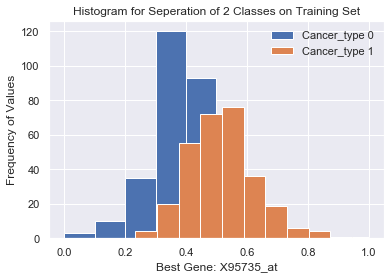

In [3441]:
# your code here
best_predictor = best10.index[0]
plt.title('Histogram for Seperation of 2 Classes on Training Set')
plt.hist(X_train_mm[best_predictor][y_train==0], label = 'Cancer_type 0')
plt.hist(X_train_mm[best_predictor][y_train==1], label = 'Cancer_type 1')
plt.xlabel(f'Best Gene: {best_predictor}')
plt.ylabel("Frequency of Values")
plt.legend()

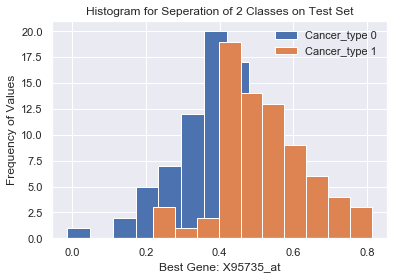

In [3442]:
plt.title('Histogram for Seperation of 2 Classes on Test Set')
plt.hist(X_test_mm[best_predictor][y_test==0], label = 'Cancer_type 0')
plt.hist(X_test_mm[best_predictor][y_test==1], label = 'Cancer_type 1')
plt.xlabel(f'Best Gene: {best_predictor}')
plt.ylabel("Frequency of Values")
plt.legend()

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Question 3: Predicting the types of cancer based on gene expression [25 points]**
<br /><br />

**3.1** [10pts] Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` identified in the previous part to predict cancer type. <br/>
**Note:** Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to not regularize (use 'C=100000').
<br /><br />

**3.2** [5pts] Print and interpret Logistic Regression coefficient and intercept. 
<br /><br />
**3.3** [10pts] Create 2 plots (with training and testing data) with the following items displayed on each plot.

- the predicted probabilities of the logistic regression model as a function of the best gene predictor. 
- the true binary response. 
- a horizontal line at $y=0.5$. 

## Solutions

### 3.1
**Fit a simple logistic regression model to the training set using the single gene predictor best_predictor identified in the previous part to predict cancer type.**<br />
Note: Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to not regularize (use 'C=100000').

In [3443]:
#your code here
logr = LogisticRegression(C = 100000)
logr.fit(X_train_mm[[best_predictor]],y_train)

ypred_train = logr.predict_proba(X_train_mm[[best_predictor]])
ypred_test = logr.predict_proba(X_test_mm[[best_predictor]])


In [3444]:
#ypred_train[:,1]

### 3.2
**Print and interpret Logistic Regression coefficient and intercept.**

In [3445]:
#your code here
print("Coefficients of Simple Logistic Regression Model:",logr.coef_)
print("Intercept of Simple Logistic Regression Model:",logr.intercept_)

Coefficients of Simple Logistic Regression Model: [[9.74744382]]
Intercept of Simple Logistic Regression Model: [-4.49563563]


**Your answer here**

### 3.3
<b>
Create 2 plots (with training and testing data) with the following items displayed on each plot.

- the predicted probabilities of the logistic regression model as a function of the best gene predictor.<br />
- the true binary response.<br />
- a horizontal line at y=0.5.
</b>

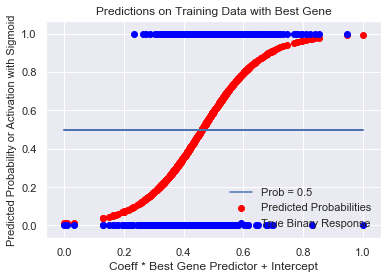

In [3446]:
#your code here
plt.scatter(X_train_mm[[best_predictor]],ypred_train[:,1], color = 'red', label = 'Predicted Probabilities')
plt.scatter(X_train_mm[[best_predictor]],y_train, color = 'blue', label = 'True Binary Response')
plt.plot(X_train_mm[[best_predictor]],[0.5 for i in range(ypred_train.shape[0])], label = 'Prob = 0.5')
plt.xlabel('Coeff * Best Gene Predictor + Intercept')
plt.ylabel('Predicted Probability or Activation with Sigmoid', fontsize = 11)
plt.title('Predictions on Training Data with Best Gene')
plt.legend()

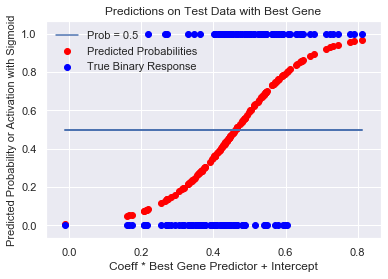

In [3447]:
plt.scatter(X_test_mm[[best_predictor]],ypred_test[:,1], color = 'red', label = 'Predicted Probabilities')
plt.scatter(X_test_mm[[best_predictor]],y_test, color = 'blue', label = 'True Binary Response')
plt.plot(X_test_mm[[best_predictor]],[0.5 for i in range(ypred_test.shape[0])], label = 'Prob = 0.5')
plt.xlabel('Coeff * Best Gene Predictor + Intercept')
plt.ylabel('Predicted Probability or Activation with Sigmoid',fontsize = 11)
plt.title('Predictions on Test Data with Best Gene')
plt.legend()

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part B: Racial bias in machine learning systems [60 points total] </h2>    <br />


![](https://static.propublica.org/projects/algorithmic-bias/assets/img/generated/opener-b-crop-2400*1350-00796e.jpg)

<br /><br />
<b> Dataset Description </b><br /><br />
The main dataset is the *compas.csv*.
The variables are roughly explained in the `compas_datadict.csv` file, and ProPublica's analysis is publically available here: https://github.com/propublica/compas-analysis.

The dataset was made publically available by **Northpointe**, an American tech-company that works with law establishment across several states in the US to predict future crimes based on past records of criminals.

It has been suspected that the software used by Northpointe, `COMPAS`, is biased against the african american criminals, who end up with `high-risk` tags, despite minor criminal record, whereas `Caucasians` regularly received low-scores despite more significant criminal charges.
    
After pressure from several news agencies and a public investigation by ProPublica, the company released this dataset with a slice of the factors usually considered in order to assign a score to criminals.
<br /><br />
The dataset also contains a column `two_year_recid` with a binary response, i.e `1` if the released criminal ended up committing another crime within two years and `0` if the criminal did not commit a crime within a period of two years.
    
To learn more about this dataset, and the public investigation, you are highly recommended to read ProPublica's article on [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 1: Setting up the problem and understanding the data [15 points]**

**1.1** [1pt] Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation here.<br />

NOTE: Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later. 
<br /><br />
**1.2** [4pts] Can you guess why processing the categorical predictors important? What is the risk of processing categorical predictors after splitting into train and validation sets?
<br /><br />

**1.3** [8pts] Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay
<br /><br />

**1.4** [2pts] Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.
<br /><br />

## Solutions

### 1.1
<b>
Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation here.
<br />
NOTE: Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later.

In [3448]:
# Get the data
df = pd.read_csv('data/compas.csv')
#print(df.head())
#Splitting the races
aa_df = df[df['race'] == 'African-American']
cc_df = df[df['race'] == 'Caucasian']

In [3449]:
#We see this to find out what all Datatypes we have for all predictors
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5554 entries, 0 to 5553
Data columns (total 23 columns):
age                               5554 non-null int64
c_charge_degree                   5554 non-null object
c_charge_desc                     5549 non-null object
race                              5554 non-null object
score_text                        5554 non-null object
sex                               5554 non-null int64
priors_count                      5554 non-null int64
juv_fel_count                     5554 non-null int64
juv_misd_count                    5554 non-null int64
juv_other_count                   5554 non-null int64
decile_score                      5554 non-null int64
two_year_recid                    5554 non-null int64
length_of_stay                    5554 non-null int64
priors_1                          5554 non-null int64
priors_234                        5554 non-null int64
priors_5plus                      5554 non-null int64
juv_fel_1plus            

We see that all predictors are either Object or Int Datatypes. Primarily Object Datatypes are usually categorical, however we can't make any assumptions. We will first see the Object Predictors, and we'll select some Int Predictors based on their unique value counts, which we'll threshold at 10.

In [3450]:
#Checking for Categorical Predictors
s = (df.dtypes == 'object')
#print(s)
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['c_charge_degree', 'c_charge_desc', 'race', 'score_text']


In [3451]:
#We keep another condition to check for categorical
#We see if Number of Unique Values is <= 10
nvals = df.nunique()
nvals


age                                65
c_charge_degree                     2
c_charge_desc                     372
race                                6
score_text                          3
sex                                 2
priors_count                       36
juv_fel_count                      10
juv_misd_count                     10
juv_other_count                     9
decile_score                       10
two_year_recid                      2
length_of_stay                    232
priors_1                            2
priors_234                          2
priors_5plus                        2
juv_fel_1plus                       2
juv_misd_1plus                      2
juv_other_1plus                     2
charge_any_drug                     2
charge_any_violence_aggression      2
charge_any_theft                    2
length_of_stay_thresh              31
dtype: int64

If Unique Value Count is 2, we know they are already Binary, so we don't One Hot Encode them

In [3452]:

nvals = (nvals <=10) & (nvals != 2)
nvals = list(nvals[nvals].index)
#print("len:",len(nvals))
nvals = [i for i in nvals if i not in object_cols]
#print('len:',len(nvals))
print("Predictors with Unique Values < 10, and not binary and not of type Object:\n",nvals)

Predictors with Unique Values < 10, and not binary and not of type Object:
 ['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'decile_score']


In [3453]:
#for i in nvals:
   # print(df[i].head(10))

3 of the above filtered Predictors are a **count**, so we can't one hot encode them as count is a value here. 
decile_score is a **score**, which has an ordering & value associated with each, so this can't be categorical either.
**So all these 4 predictors are not wanting to give seperate classes, but instead giving scores or counts.**
We see that our Analysis didn't lead to a categorical predictor in the int datatypes, but this was necessary to conduct as a lot of times we can encounter a numerical categorical predictor too.

In [3454]:
df.drop(columns = ['c_charge_desc'], inplace = True)
object_cols.remove('c_charge_desc')
#object_cols

#Even though c_charge_desc is of type object
#Seeing that it has 372 'categories' & it would be biased to Label Encode it (As can't compare crimes in ordinal order)
#We decide to drop it


#Observing some Ordinality in score_text, we had decided to Label Encode it
#However, we realise that it won't contribute to our analysis and is infact giving a lower accuracy with it, due to correlation effects with other predictors. **So we will drop it before training our Model**


In [3455]:
object_cols.remove('score_text')
#object_cols


In [3456]:
one_hot = pd.get_dummies(df[object_cols], drop_first= True)
df = pd.concat([df,one_hot], axis = 1)
object_cols.remove('race')
df.drop(columns = object_cols, inplace=True)

In [3457]:
from sklearn.preprocessing import LabelEncoder
# transform and map score_text
sk_lab = LabelEncoder()
score_labels = sk_lab.fit_transform(df['score_text'])
df['score_text'] = score_labels

In [3458]:
#df.head(10)

In [3459]:
train_data, val_data = train_test_split(df, train_size = 0.8, stratify = df['race'] )

In [3460]:
print('Train:\n')
print(train_data.race.value_counts()/len(train_data))
print('\nValidation:\n')
print(val_data.race.value_counts()/len(val_data))


Train:

African-American    0.514517
Caucasian           0.340761
Hispanic            0.082377
Other               0.055593
Asian               0.004952
Native American     0.001801
Name: race, dtype: float64

Validation:

African-American    0.513951
Caucasian           0.340234
Hispanic            0.082808
Other               0.055806
Asian               0.005401
Native American     0.001800
Name: race, dtype: float64


**We observe that both splits have almost same percentage value for each race in them. Thus they are Stratified by Race**

In [3461]:
train_data_C = train_data
val_data_C = val_data

In [3462]:
train_data = train_data.drop(columns = ['race'])
val_data = val_data.drop(columns = ['race'])

#print(train_data_C.columns)
#print(val_data_C.columns)

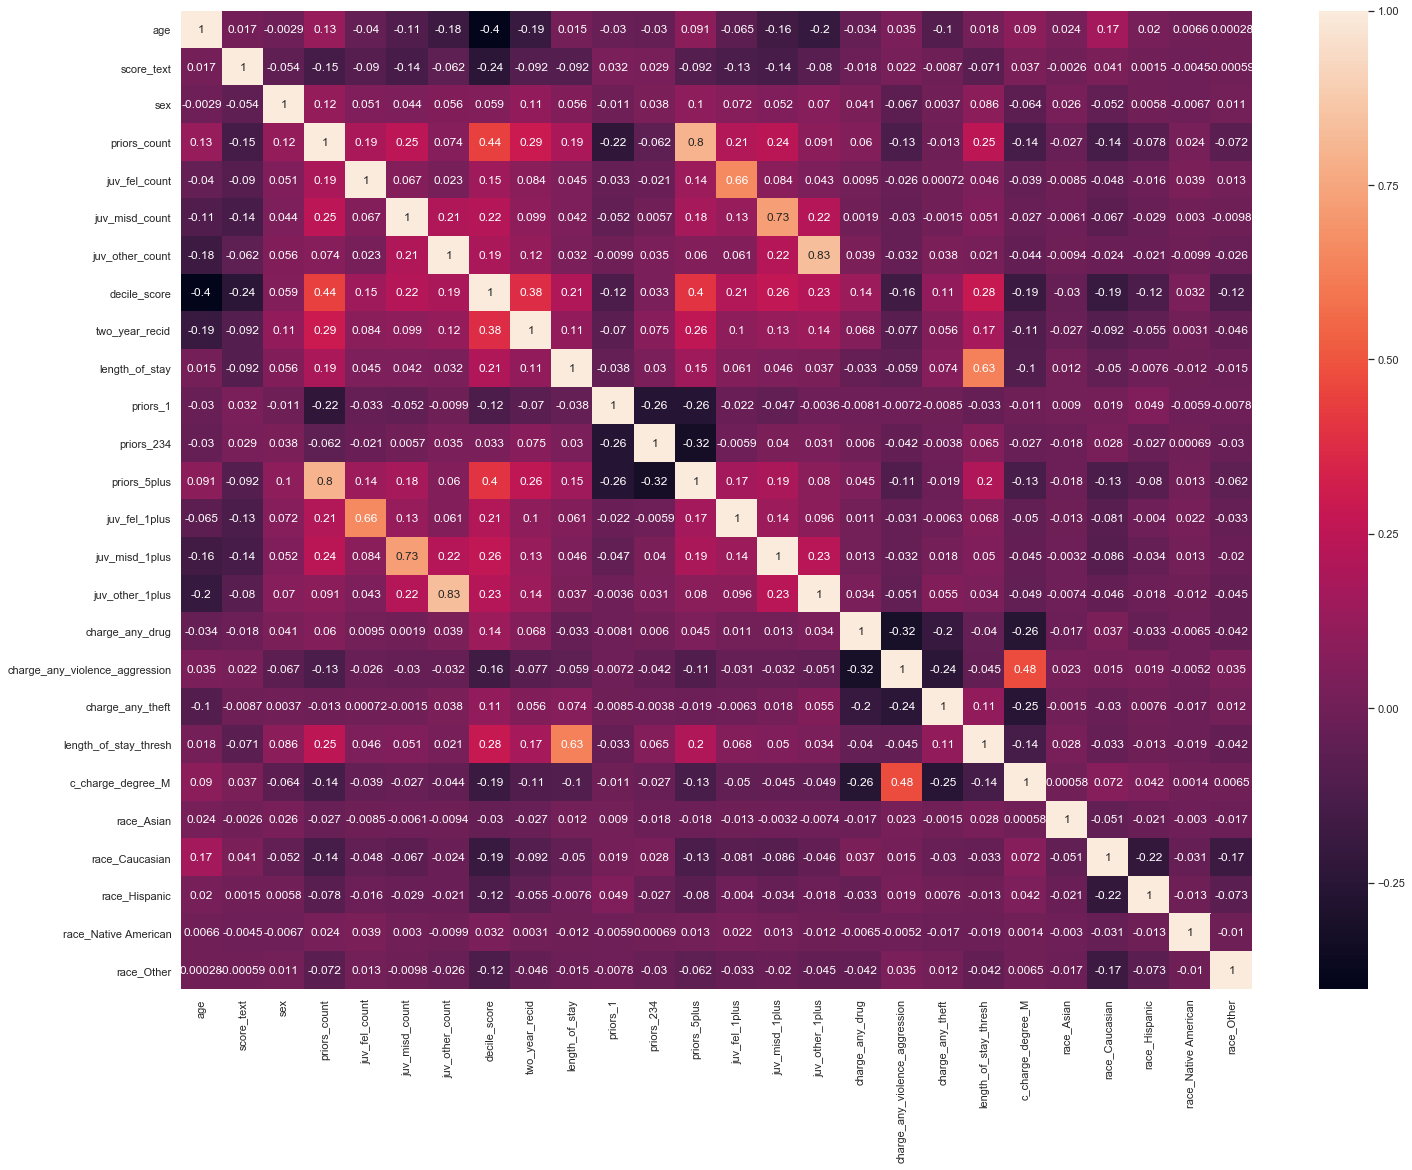

In [3463]:
#your code here
fig, ax = plt.subplots(figsize=(24,18))
sns.heatmap(train_data.corr(), annot = True, ax = ax)

In [3464]:
#val_data.describe()

### 1.2
<b>Can you guess why processing the categorical predictors important? What is the risk of processing categorical predictors after splitting into train and validation sets?

**If we do so 'After' splitting, then we may get a split where some class or category isn't present only in either of the split, leading it to have one less column in the processing. Thus this can be dangerous & lead to missing information from predictors.** So we must first process the categorical predictors & then split

### 1.3
<b>
Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay


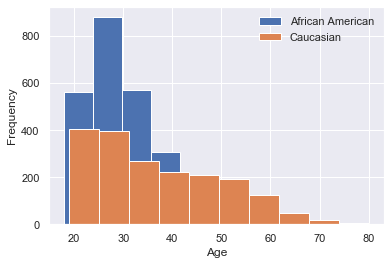

In [3465]:
#your code here

plt.hist(aa_df['age'], label = 'African American')
plt.hist(cc_df['age'], label = 'Caucasian')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()


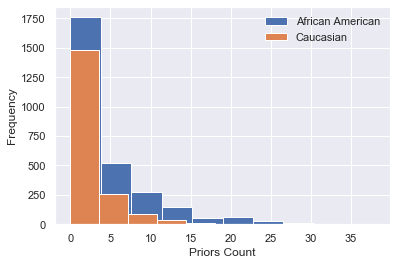

In [3466]:
plt.hist(aa_df['priors_count'], label = 'African American')
plt.hist(cc_df['priors_count'], label = 'Caucasian')
plt.xlabel('Priors Count')
plt.ylabel('Frequency')
plt.legend()

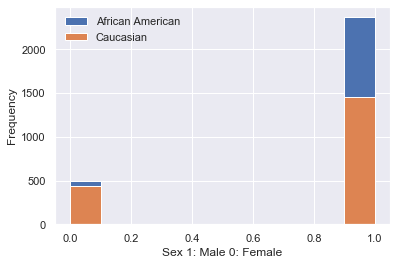

In [3467]:
plt.hist(aa_df['sex'], label = 'African American')
plt.hist(cc_df['sex'], label = 'Caucasian')
plt.xlabel('Sex 1: Male 0: Female')
plt.ylabel('Frequency')
plt.legend()

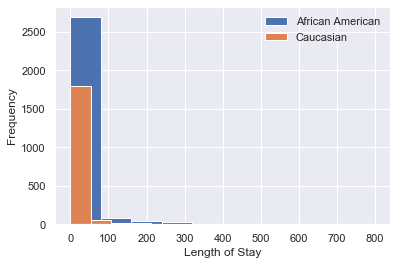

In [3468]:
plt.hist(aa_df['length_of_stay'], label = 'African American')
plt.hist(cc_df['length_of_stay'], label = 'Caucasian')
#x1,x2,y1,y2 = plt.axis()

#plt.axis((x1,x2,0,20))
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')
plt.legend()

### 1.4
<b> 
Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.

We see from the Histograms of all 4 of the variables, the African American almost always have higher frequencies/ numbers. **Both Sex & Length of Stay suggest that African Americans are arrested more and are imprisoned for longer durations.**
Even Prior Counts & Age shows disparity indicating that for the same number of Prior Offenses and for same young age groups(20-45), there are more African Americans than Caucasians.


**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
   
**Question 2: Baseline model fitting [19 points]**

**2.1** [15pts] Build a logistic regression model to predict recidivism (`two_year_recid`) on these data and be sure to include race as a predictor.<br />
**NOTE**: In your list of predictors, `race` is one of the predictors.

Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. *False Positive Rate(FPR)* as a percentage for:
    - `African Americans`
    - `Cacausians`
3. *False Negative Rate(FNR)* as a percentage for:
    - `African Americans`
    - `Caucasians`
4. Ratio of the FPR between `African_Americans` and `Caucasians`
5. Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$

<br  /><br />
**2.2** [4pts] What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.


## Solutions

### 2.1
<b> 
Build a logistic regression model to predict recidivism (two_year_recid) on these data and be sure to include race as a predictor.

In [3469]:
# your code here 
y = train_data['two_year_recid']
X = train_data.drop(columns = ['two_year_recid'])

X_val = val_data.drop(columns = ['two_year_recid'])
y_val = val_data['two_year_recid']

In [3470]:
#'juv_other_1plus'
#'length_of_stay'
#'length_of_stay_thresh'
#'priors_count'
#'priors_5plus'
X.drop(columns = ['score_text'], inplace = True)
X_val.drop(columns = ['score_text'], inplace = True)
#X.info()

In [3471]:
logr = LogisticRegression(C=100000, max_iter = 10000)
logr.fit(X,y)
y_pred = logr.predict(X_val)
acur_scr = accuracy_score(y_val, y_pred)
acur_scr = round(acur_scr*100,2)
print('Accuracy in Logistic Model %:', acur_scr)

Accuracy in Logistic Model %: 68.77


In [3472]:
#Getting the true values for African American & Caucasian
val_AA = val_data[(val_data['race_Asian'] == 0)&(val_data['race_Caucasian']== 0)&(val_data['race_Caucasian']==0)&(val_data['race_Hispanic']==0)&(val_data['race_Native American']==0)&(val_data['race_Other']==0)]

val_C = val_data[(val_data['race_Caucasian']==1)]

y_tr_AA = val_AA['two_year_recid']
y_tr_C = val_C['two_year_recid']



In [3473]:
#Getting the Predictions made for African Americans & Caucasian
xval = X_val.reset_index()
ind = xval.loc[xval['index'].isin(val_AA.index)].index
y_pred_AA = y_pred[ind]
ind_C = xval.loc[xval['index'].isin(val_C.index)].index
y_pred_C = y_pred[ind_C]

Text(0.5, 1, 'Logistic Regression Confusion Matrix')

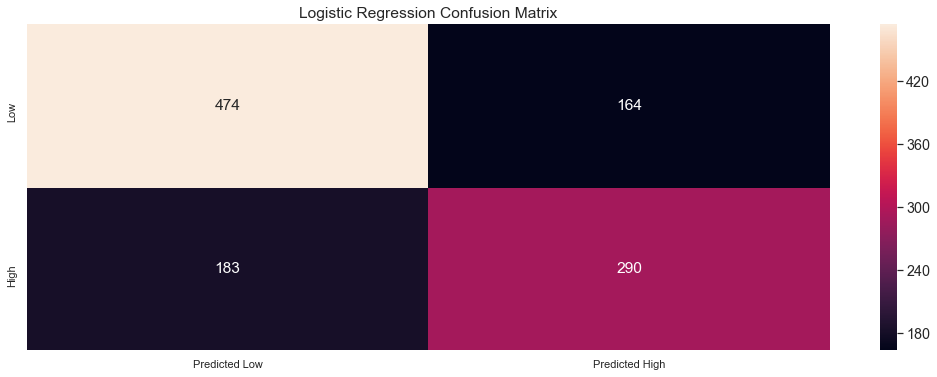

In [3474]:
# Confusion Matrix for Basic Logistic Regression Model
conf_Log = metrics.confusion_matrix(y_val, y_pred)
fig, axes = plt.subplots(figsize=(18,6))

new_conf = pd.DataFrame(conf_Log, index = ['Low','High'],columns = ['Predicted Low','Predicted High'])


sns.set(font_scale=1.3)
sns.heatmap(new_conf.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes)
axes.set_ylim([0,2]);
axes.set_title('Logistic Regression Confusion Matrix')

#Credits to Hargun sir for telling this better way to plot :D


False Positive Rate as % for African Americans: 33.218
False Negative Rate as % for African Americans: 28.369


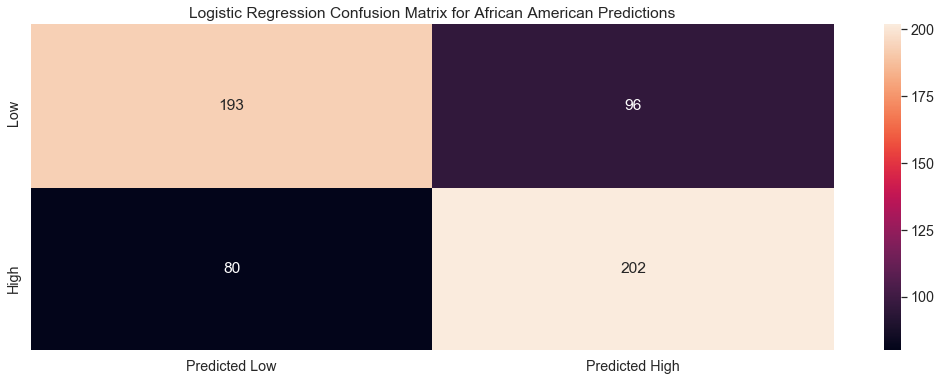

In [3475]:
# Confusion Matrix for African Americans
conf_AA = metrics.confusion_matrix(y_tr_AA, y_pred_AA)
fig, axes = plt.subplots(figsize=(18,6))

new_conf = pd.DataFrame(conf_AA, index = ['Low','High'],columns = ['Predicted Low','Predicted High'])


sns.set(font_scale=1.3)
sns.heatmap(new_conf.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes)
axes.set_ylim([0,2]);
axes.set_title('Logistic Regression Confusion Matrix for African American Predictions')

#FPR = FP/ (TN + FP)
false_pos_AA = conf_AA[0][1]
true_neg_AA = conf_AA[0][0]
fpr_AA = round((false_pos_AA/(true_neg_AA + false_pos_AA))*100, 3)

print('False Positive Rate as % for African Americans:',fpr_AA)

#FNR = FN/ (FN + TP) Also called Miss Rate : Prob that a True Positive will be missed
false_neg_AA = conf_AA[1][0]
true_pos_AA = conf_AA[1][1]
fnr_AA = round((false_neg_AA/(true_pos_AA + false_neg_AA))*100, 3)

print('False Negative Rate as % for African Americans:',fnr_AA)

False Positive Rate as % for Caucasians: 20.675
False Negative Rate as % for Caucasians: 53.191


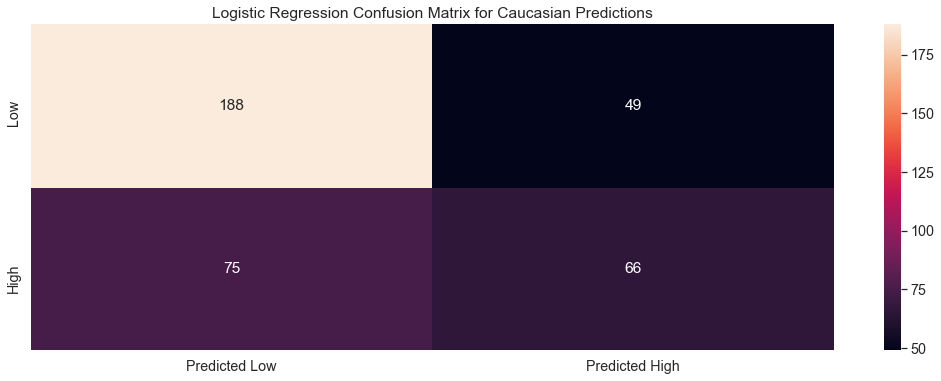

In [3476]:
# Confusion Matrix for Caucasians
conf_C = metrics.confusion_matrix(y_tr_C, y_pred_C)
fig, axes = plt.subplots(figsize=(18,6))

new_conf = pd.DataFrame(conf_C, index = ['Low','High'],columns = ['Predicted Low','Predicted High'])


sns.set(font_scale=1.3)
sns.heatmap(new_conf.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes)
axes.set_ylim([0,2]);
axes.set_title('Logistic Regression Confusion Matrix for Caucasian Predictions')

#FPR = FP/ (TN + FP)
false_pos_C = conf_C[0][1]
true_neg_C = conf_C[0][0]
fpr_C = round((false_pos_C/(true_neg_C + false_pos_C))*100, 3)

print('False Positive Rate as % for Caucasians:',fpr_C)

#FNR = FN/ (FN + TP) Also called Miss Rate :Prob that a True Positive will be missed
false_neg_C = conf_C[1][0]
true_pos_C = conf_C[1][1]
fnr_C = round((false_neg_C/(true_pos_C + false_neg_C))*100, 3)

print('False Negative Rate as % for Caucasians:',fnr_C)


In [3477]:
Ratio_FPR = fpr_AA/fpr_C
print('Ratio of False Positive Rates between African Americans & Caucasians:',round(Ratio_FPR,2))

Ratio_FNR = fnr_AA/fnr_C
print('Ratio of False Negative Rates between African Americans & Caucasians:',round(Ratio_FNR,2))

Ratio of False Positive Rates between African Americans & Caucasians: 1.61
Ratio of False Negative Rates between African Americans & Caucasians: 0.53


### 2.2
<b>
What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.

We observe that there is indeed a high disparity between the FPR & FNR of the 2 groups. False Positive Rate for African Americans is always higher than those of the Cacasians, which shows that more African Americans are falsely predicted to said to commit a crime after imprisonment. At the other end, the False Negative Rate for the Caucasians is higher than that of African Americans, which tells us that more Caucasians are let off the hook in terms of being predicted to do recidivism. Thus the miss rate for Caucasians is higher.

This shows that the 'Bias' against the African Americans is on 2 fronts. First they are being more falsely predicted of recidivism, and Second that Caucasians are not being seen as a threat. So this is like a 'double bias' against the African Americans.  

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 3: 'Race'less model fitting [16 points]**
 
**3.1** [10pts] Refit the logistic model in 2.1 but this time **without** `race` as a predictor. 
Again, Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. **False Positive Rate(FPR)** as a percentage for:
    - African Americans
    - Caucasians
2. **False Negative Rate(FNR)** as a percentage for:
    - African Americans
    - Caucasians
3. 
    - Ratio of the FPR between `African_Americans` and `Caucasians`
    - Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$


<br /><br />

**3.2** [2pts] Now, without the `race` as a predictor, what do you observe? 
<br /><br />
**3.3** [2pts] How do these compare to the model when the race **is** included as a predictor?
<br /><br />
**3.4** [2pts] Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


## Solutions

### 3.1
<b>
Refit the logistic model in 2.1 but this time without race as a predictor. 

In [3478]:
#your code here
y = train_data['two_year_recid']
X = train_data.drop(columns = ['score_text','two_year_recid', 'race_Hispanic', 'race_Other', 'race_Native American', 'race_Asian', 'race_Caucasian'])

X_val = val_data.drop(columns = ['score_text','two_year_recid', 'race_Hispanic', 'race_Other', 'race_Native American', 'race_Asian', 'race_Caucasian'])

y_val = val_data['two_year_recid']

In [3479]:
logr = LogisticRegression(C=100000, max_iter = 10000)
logr.fit(X,y)
y_pred = logr.predict(X_val)
y_pred_probs = logr.predict_proba(X_val)[:,1]
acur_scr = accuracy_score(y_val, y_pred)
acur_scr = round(acur_scr*100,2)
print('Accuracy in Logistic Model %:(without race)', acur_scr)

Accuracy in Logistic Model %:(without race) 68.32


In [3480]:
#Getting the true values for African American & Caucasian
val_AA = val_data[(val_data['race_Asian'] == 0)&(val_data['race_Caucasian']== 0)&(val_data['race_Caucasian']==0)&(val_data['race_Hispanic']==0)&(val_data['race_Native American']==0)&(val_data['race_Other']==0)]

val_C = val_data[(val_data['race_Caucasian']==1)]

y_tr_AA = val_AA['two_year_recid']
y_tr_C = val_C['two_year_recid']


In [3481]:
#Getting the Predictions made for African Americans & Caucasian
xval = X_val.reset_index()
ind = xval.loc[xval['index'].isin(val_AA.index)].index
y_pred_AA = y_pred[ind]
y_probs_AA = y_pred_probs[ind]
ind_C = xval.loc[xval['index'].isin(val_C.index)].index
y_pred_C = y_pred[ind_C]
y_probs_C = y_pred_probs[ind_C]

False Positive Rate as % for African Americans(without race): 33.218
False Negative Rate as % for African Americans(without race): 29.078


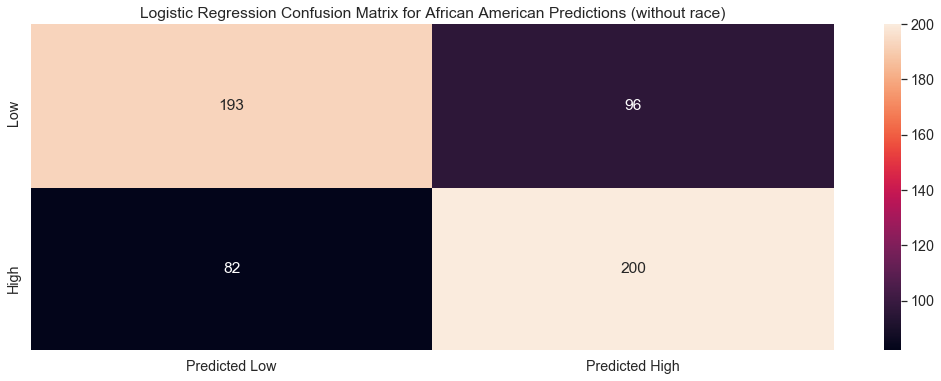

In [3482]:
# Confusion Matrix for African Americans
conf_AA = metrics.confusion_matrix(y_tr_AA, y_pred_AA)
fig, axes = plt.subplots(figsize=(18,6))

new_conf = pd.DataFrame(conf_AA, index = ['Low','High'],columns = ['Predicted Low','Predicted High'])


sns.set(font_scale=1.3)
sns.heatmap(new_conf.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes)
axes.set_ylim([0,2]);
axes.set_title('Logistic Regression Confusion Matrix for African American Predictions (without race)')

#FPR = FP/ (TN + FP)
false_pos_AA = conf_AA[0][1]
true_neg_AA = conf_AA[0][0]
fpr_AA = round((false_pos_AA/(true_neg_AA + false_pos_AA))*100, 3)

print('False Positive Rate as % for African Americans(without race):',fpr_AA)

#FNR = FN/ (FN + TP) Also called Miss Rate : Prob that a True Positive will be missed
false_neg_AA = conf_AA[1][0]
true_pos_AA = conf_AA[1][1]
fnr_AA = round((false_neg_AA/(true_pos_AA + false_neg_AA))*100, 3)

print('False Negative Rate as % for African Americans(without race):',fnr_AA)

False Positive Rate as % for Caucasians(without race): 20.675
False Negative Rate as % for Caucasians(without race): 53.191


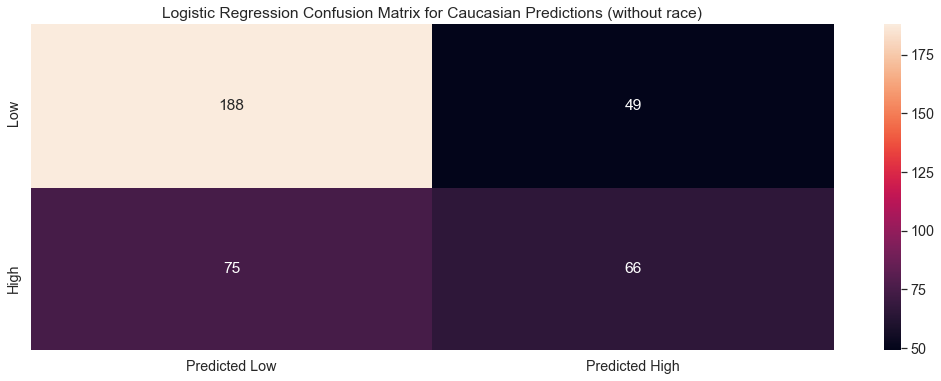

In [3483]:
# Confusion Matrix for Caucasians
conf_C = metrics.confusion_matrix(y_tr_C, y_pred_C)
fig, axes = plt.subplots(figsize=(18,6))

new_conf = pd.DataFrame(conf_C, index = ['Low','High'],columns = ['Predicted Low','Predicted High'])


sns.set(font_scale=1.3)
sns.heatmap(new_conf.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes)
axes.set_ylim([0,2]);
axes.set_title('Logistic Regression Confusion Matrix for Caucasian Predictions (without race)')

#FPR = FP/ (TN + FP)
false_pos_C = conf_C[0][1]
true_neg_C = conf_C[0][0]
fpr_C = round((false_pos_C/(true_neg_C + false_pos_C))*100, 3)

print('False Positive Rate as % for Caucasians(without race):',fpr_C)

#FNR = FN/ (FN + TP) Also called Miss Rate :Prob that a True Positive will be missed
false_neg_C = conf_C[1][0]
true_pos_C = conf_C[1][1]
fnr_C = round((false_neg_C/(true_pos_C + false_neg_C))*100, 3)

print('False Negative Rate as % for Caucasians(without race):',fnr_C)

In [3484]:
Ratio_FPR = fpr_AA/fpr_C
print('Ratio of False Positive Rates between African Americans & Caucasians(w/o race):',round(Ratio_FPR,2))

Ratio_FNR = fnr_AA/fnr_C
print('Ratio of False Negative Rates between African Americans & Caucasians(w/o race):',round(Ratio_FNR,2))

Ratio of False Positive Rates between African Americans & Caucasians(w/o race): 1.61
Ratio of False Negative Rates between African Americans & Caucasians(w/o race): 0.55


### 3.2
<b>
Now, without the race as a predictor, what do you observe?

Even without race as a predictor, we observe that there is still a bias against the African Americans in terms of the False Positive Rates of AA being greater than those of Caucasians, and the Miss rate for Caucasians being higher than that of African Americans. We also see that the Accuracy of the model is more or less the same as previously seen with race as a predictor.


### 3.3
<b>How do these compare to the model when the race is included as a predictor?

We see that the False Positive Rates and the False Negative Rates in this model, are more or less same as that of the model with race as a predictor. The ratio of FPRs and FNRs is also more or less same as that for the model with race as a predictor.

We also don't see a major change in accuracy from the previous model.

### 3.4
<b>Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


We believe that a predictive tool **shouldn't be trusted to be unbiased, even if it doesn't explicitly use a variable such as race to predict future crime. As seen here in this model too, even without race as a predictor, the Bias in the model is still present & occuring.** 

The reason we think this is there, is **because of the type of data the model is getting.** There are more number of African Americans arrested than Caucasians, even though the severity & magnitude of their crimes might not be same. African Americans are given severe punishments and imprisoned for even a crime of small magnitude, which is therefore present in the data, which makes the African Americans look 'bad' to the model. Thus the **Bias of the society is leaking into the data & thus the model**, without even race explicitly being used as a predictor.

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 4: Receiver Operating Characteristic curve [10 points]**

**4.1** [5pts] Use logistic regression & upsampling methods from above and plot the *Receiver Operating Characteristic curve* for two races, `African Americans` & `Caucasians`. 
<br /><br />
**4.2** [5pts] You will notice that changing the thresholds can *reduce* bias between the two classes, but it can also affect model accuracy. We want our model to be **accurate** but also **unbiased**. So what shall we do?

- Remove bias?
- Lose model accuracy?

Write down your strategy to overcome this difficulty. Please keep your answers short (300 word limit)


## Solutions

### 4.1
<b>
Use logistic regression & upsampling methods from above and plot the Receiver Operating Characteristic curve for two races, African Americans & Caucasians.

In [3485]:
# Area under the roc curve



#logreg_roc_auc = roc_auc_score(y_test,logreg.predict(X_test))
logreg_auc = metrics.roc_auc_score(y_tr_AA,y_pred_AA)
#knn_roc_auc = roc_auc_score(y_test,knnreg.predict(X_test))
Creg_auc = metrics.roc_auc_score(y_tr_C,y_pred_C)

In [3486]:
#your code here
#Credit to Hargun Sir for Case Study Code to help with this

def plot_roc(test_C,test_AA,logprobs,ccprobs,axis):
    fpr, tpr, thresholds = metrics.roc_curve(test_AA, logprobs)
    kfpr, ktpr, kthresholds = metrics.roc_curve(test_C, ccprobs)
    ax.plot(fpr, tpr, label=f'African American (area = {logreg_auc:.2f})', color = 'b')
    ax.plot(kfpr, ktpr, label=f'Caucasian (area = {Creg_auc:.2f})', color = 'g')  
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.4,
    )
    #
    for k in range(0, fpr.shape[0],35):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    for k in range(0, kfpr.shape[0],35):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(kthresholds[k], 2))
        ax.annotate(threshold, (kfpr[k], ktpr[k]),color='r', **label_kwargs)

    ax.plot([0, 1], [0, 1],'r--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")


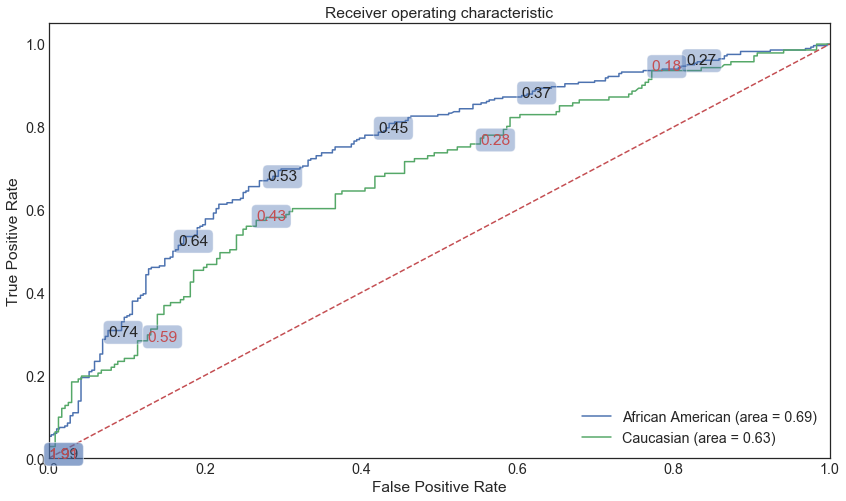

In [3487]:
#ROC Curve values
plt.style.use('seaborn-white')
#y_probs = logreg.predict_proba(X_test)[:,1]
#y_kprobs = knnreg.predict_proba(X_test)[:,1]
fig, ax = plt.subplots(figsize = (14,8))
plot_roc(y_tr_C,y_tr_AA,y_probs_AA,y_probs_C,ax)

### 4.2
<b>
How to ensure the model is accuracte and unbiased? Please keep your answers short (300 word limit)

**Dealing with Bias to predict two-year recidivism.** 

We First noticed through EDA that percentage distribution in crime type (violent, theft, Drug) is more or less equally distributed between the two races and even then we noticed a huge bias in Decile Score, with more than 25% of the Caucasians were classified for the lowest score of 1 while only 10% African Americans got that score, adding to that was the fact that high scores of 7 and above were dominated by African Americans with percentage distribution of almost 10% for each of this score while Caucasians ranged between 2.5 - 5% for this high decile score. Our Initial Inference was that the model is biased against African Americans. 
As we fit the model and see the ratio of false positives rates between the two races and quickly realize that the African Americans are falsely being predicted 2.5X more likely to commit a crime within two years as compared to Caucasians, which reaffirms our belief that the model is biased against African Americans. When we see the miss rate we see that the model is twice as likely to falsely categorize Caucasians will not commit crime as compared to African American thus suggesting that the bias is not just limited to against African Americans but instead it also favours Caucasians

To decrease the Bias in the model we would drop the predictor decile score, which should decrease the ratio to some extent, but there are many other factors in a society that systematically oppresses one race over the other such as high arrest rate for a smaller crime for the minority rate. 

Increasing  Accuracy Score
1. We can try various methods to do this such as using polynomial features and finding the best degree for the polynomial 
2. We can try regularisation of parameters by changing the c value and finding the best for the model and thus increasing the accuracy score 
3. we can try upsampling techniques which can substantially improve our accuracy score such as SMOTE

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part C: Come up with a better model [20 points total] 
</h2>  
    
Improve the models you have previously coded by including:
 - Polynomial terms
 - Interaction terms
 - Regularization parameters
 - Different upsampling techniques
 - KNN classification

with a goal to maximize the new metric which includes both the bias and the accuracy, we define `Bias_Corrected_Accuracy(BCA)` as:
    

$$BCA = Acccuracy - {\left|FPR(AA) - FPR(CC)\right|}$$
    
 
Please report your maximum `BCA` on the forums and add the computation code to your homework for bonus points.

**Note:** The ideas given above are not exhaustive. You are free to try other betters to come up with a better model.



**To make a better Model, we did some more EDA, which led us to the fact that there is a huge gap in the number of samples in African-American & Caucasian Convicts**

We plotted some histograms of the two classes, but this time with Percentage of Population in Y-Axis, instead of Frequency. We saw that with respect to many predictors, the percentage of Caucasians was almost same to Percentage of African Americans, even thought the actual numbers were less. This shows that there is a Class Imbalance in the Data

**To Tackle that issue, we tried doing SMOTE, with respect to the 'race' predictor. This is giving equal number of samples of all races, and we use this new data to train our Logistic Regression Model.**

We see a small increase in accuracy, but many a times we see a decrease in accuracy, as the train data is depending on the original Train-Validation Split we did in the earlier parts.

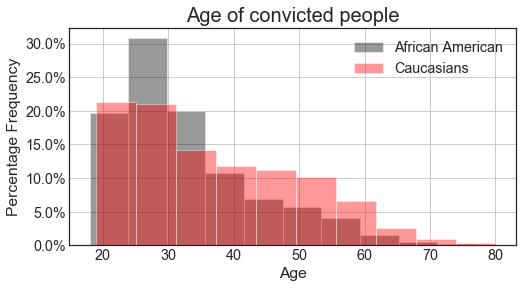

In [3488]:
from matplotlib.ticker import PercentFormatter
n_aa = len(aa_df)
n_cc =len(cc_df)

fig, axis = plt.subplots(figsize=(8, 4))
aa_df['age'].hist(weights=np.ones(n_aa) / n_aa , ax=axis, label = 'African American', color ='black', alpha=0.4)
cc_df['age'].hist(weights=np.ones(n_cc) / n_cc, ax=axis, label = 'Caucasians', color ='red', alpha=0.4)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Age of convicted people', fontsize=20)
plt.xlabel('Age')
plt.ylabel("Percentage Frequency")
plt.legend()
plt.show()

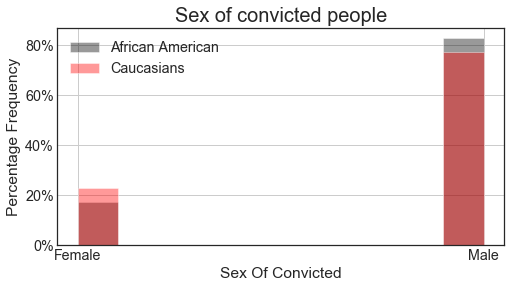

In [3489]:
fig, axis = plt.subplots(figsize=(8, 4))
aa_df['sex'].hist(weights=np.ones(n_aa) / n_aa , ax=axis, label = 'African American', color ='black', alpha=0.4)
cc_df['sex'].hist(weights=np.ones(n_cc) / n_cc, ax=axis, label = 'Caucasians', color ='red', alpha=0.4)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Sex of convicted people', fontsize=20)
plt.xticks(np.arange(2), ('Female', 'Male'))
plt.xlabel('Sex Of Convicted')
plt.ylabel("Percentage Frequency")
plt.legend()
plt.show()

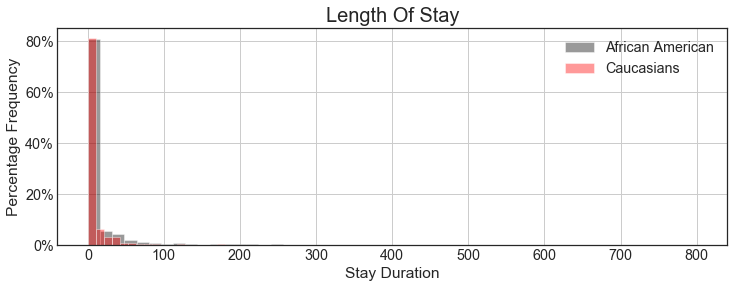

In [3490]:
fig, axis = plt.subplots(figsize=(12, 4))
aa_df['length_of_stay'].hist(bins = 50, weights=np.ones(n_aa) / n_aa , ax=axis, label = 'African American', color ='black', alpha=0.4)
cc_df['length_of_stay'].hist(bins=50, weights=np.ones(n_cc) / n_cc, ax=axis, label = 'Caucasians', color ='red', alpha=0.4)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Length Of Stay', fontsize=20)
plt.xlabel('Stay Duration')
plt.ylabel("Percentage Frequency")
plt.legend()
plt.show()

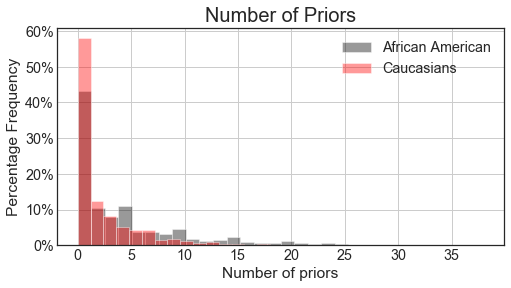

In [3491]:
fig, axis = plt.subplots(figsize=(8, 4))
aa_df['priors_count'].hist(bins=30,weights=np.ones(n_aa) / n_aa , ax=axis, label = 'African American', color ='black', alpha=0.4)
cc_df['priors_count'].hist(bins=30,weights=np.ones(n_cc) / n_cc, ax=axis, label = 'Caucasians', color ='red', alpha=0.4)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Number of Priors', fontsize=20)
plt.xlabel('Number of priors')
plt.ylabel("Percentage Frequency")
plt.legend()
plt.show()

Inference - 
1. Priors For African American People seems to be more as compared to that for Caucasians. 
2. Priors is not a good indicator, as systematic racism may lead to higher rate of arrests for smaller crimes amongst the minority community. 

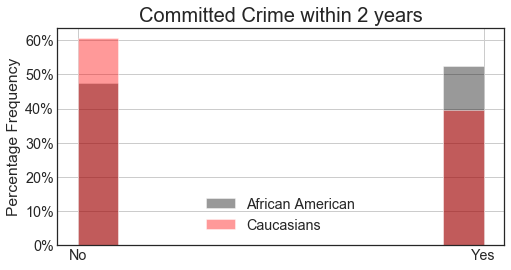

In [3492]:
fig, axis = plt.subplots(figsize=(8, 4))
aa_df['two_year_recid'].hist(weights=np.ones(n_aa) / n_aa ,ax=axis, label = 'African American', color ='black', alpha=0.4)
cc_df['two_year_recid'].hist(weights=np.ones(n_cc) / n_cc,ax=axis, label = 'Caucasians', color ='red', alpha=0.4)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.title('Committed Crime within 2 years', fontsize=20)
plt.ylabel('Percentage Frequency')
plt.legend()
plt.show()

Inference - 
1. While the number of people who commited crime within two years for African American People is higher, the number of people who did not commit crime is also higher for African American.
2. Employment oppurtunites are limited after an individual has committed a felony espcially for the systematically operessed race. 
3. Lower rate of employment may lead to relapse in criminal activity amongst individuals. 

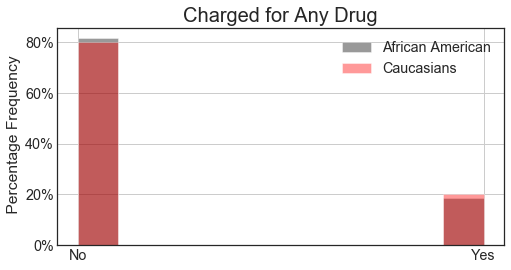

In [3493]:
fig, axis = plt.subplots(figsize=(8, 4))
aa_df['charge_any_drug'].hist(weights=np.ones(n_aa) / n_aa ,ax=axis, label = 'African American', color ='black', alpha=0.4)
cc_df['charge_any_drug'].hist(weights=np.ones(n_cc) / n_cc, ax=axis, label = 'Caucasians', color ='red', alpha=0.4)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Charged for Any Drug', fontsize=20)
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.ylabel(' Percentage Frequency')
plt.legend()
plt.show()

Inference - 
1. The percentage of people who committed crimes related to drugs are slightly higher for Caucassians than for African Americans. 

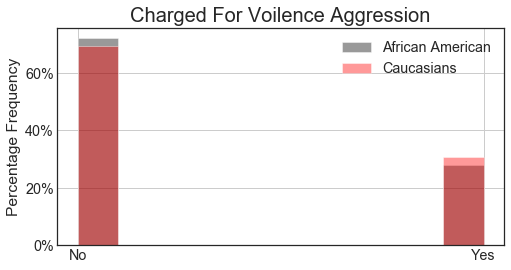

In [3494]:
fig, axis = plt.subplots(figsize=(8, 4))
aa_df['charge_any_violence_aggression'].hist(weights=np.ones(n_aa) / n_aa ,ax=axis, label = 'African American', color ='black', alpha=0.4)
cc_df['charge_any_violence_aggression'].hist(weights=np.ones(n_cc) / n_cc, ax=axis, label = 'Caucasians', color ='red', alpha=0.4)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Charged For Voilence Aggression', fontsize=20)
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.ylabel('Percentage Frequency')
plt.legend()
plt.show()

Inference - 
1. The percentage of people who committed voilent crimes are slightly higher for Caucassians than for African Americans. 

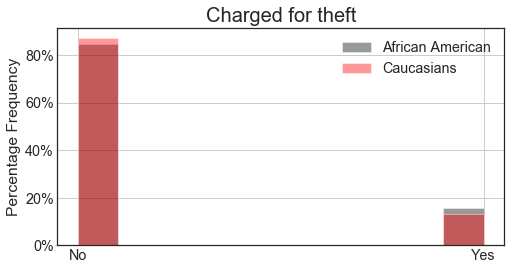

In [3495]:
fig, axis = plt.subplots(figsize=(8, 4))
aa_df['charge_any_theft'].hist(weights=np.ones(n_aa) / n_aa ,ax=axis, label = 'African American', color ='black', alpha=0.4)
cc_df['charge_any_theft'].hist(weights=np.ones(n_cc) / n_cc, ax=axis, label = 'Caucasians', color ='red', alpha=0.4)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Charged for theft', fontsize=20)
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.ylabel('Percentage Frequency')
plt.legend()
plt.show()

Infernce - 
1. The percentage of people who committed theft crimes are slightly higher for African Americans than Caucasians. 

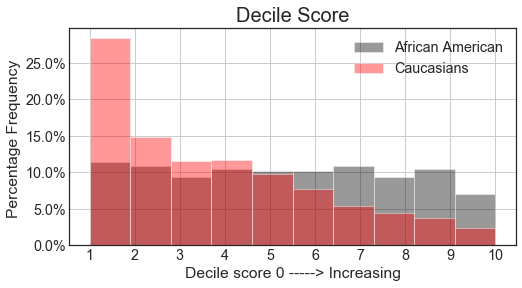

In [3496]:
fig, axis = plt.subplots(figsize=(8, 4))
aa_df['decile_score'].hist(weights=np.ones(n_aa) / n_aa ,ax=axis, label = 'African American', color ='black', alpha=0.4)
cc_df['decile_score'].hist(weights=np.ones(n_cc) / n_cc,ax=axis, label = 'Caucasians', color ='red', alpha=0.4)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(np.arange(1,11))
plt.title('Decile Score', fontsize=20)
plt.xlabel('Decile score 0 -----> Increasing')
plt.ylabel("Percentage Frequency ")
plt.legend()
plt.show()

Inference- 

1. We have infered above that percentage of people who have commited drug crimes and voilent crimes are slightly higher for Caucasians while people who have commited theft is slightly higher for African Americans.And even then the percentage of people who have a decile score of 1 is over 25% for Caucasians and around 10% for African Americans. 
2. We can also see that the percentage of people who have the highest decile score (7 and above) are around 10% while for Caucasians it ranges from 2.5% - 5% 
3. We can see a **clear bias against African American** People through initial Exploratory Data Analysis.

In [3497]:
# your code here 
y = train_data_C[['race']]
X = train_data_C.drop(columns = ['race', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American',
       'race_Other'],)

X_val = val_data.drop(columns = ['two_year_recid'])
y_val = val_data['two_year_recid']

X.drop(columns = ['score_text'], inplace = True)
X_val.drop(columns = ['score_text'], inplace = True)
#print(X.head(20))

In [3498]:
#your code here
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X, y)
#print(X_train_SMOTE.head(20))
#print(y_train_SMOTE.nunique())

y_train_SMOTE['two_year_recid'] = X_train_SMOTE['two_year_recid']
X_train_SMOTE['race'] = y_train_SMOTE['race']
y_train_SMOTE = y_train_SMOTE.drop(columns = ['race'])
X_train_SMOTE = X_train_SMOTE.drop(columns = ['two_year_recid'])

y_train_SMOTE = np.ravel(y_train_SMOTE)

one_hot = pd.get_dummies(X_train_SMOTE['race'], drop_first= True)
X_train_SMOTE = pd.concat([X_train_SMOTE,one_hot], axis = 1)

X_train_SMOTE = X_train_SMOTE.drop(columns = ['race'])

logr = LogisticRegression(C=100000, max_iter = 10000)
logr.fit(X_train_SMOTE,y_train_SMOTE)
y_pred = logr.predict(X_val)
acur_scr = accuracy_score(y_val, y_pred)
acur_scr = round(acur_scr*100,2)
print('Accuracy in Logistic Model % after SMOTE:', acur_scr)



Accuracy in Logistic Model % after SMOTE: 68.14


In [3499]:
#Getting the Predictions made for African Americans & Caucasian
xval = X_val.reset_index()
ind = xval.loc[xval['index'].isin(val_AA.index)].index
y_pred_AA = y_pred[ind]
y_probs_AA = y_pred_probs[ind]
ind_C = xval.loc[xval['index'].isin(val_C.index)].index
y_pred_C = y_pred[ind_C]
y_probs_C = y_pred_probs[ind_C]

False Positive Rate as % for African Americans(after SMOTE): 33.564
False Negative Rate as % for African Americans(after SMOTE): 29.433


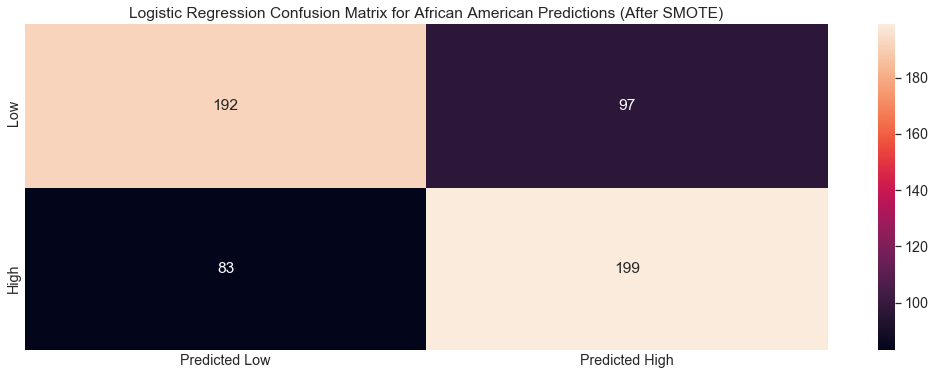

In [3500]:
# Confusion Matrix for African Americans
conf_AA = metrics.confusion_matrix(y_tr_AA, y_pred_AA)
fig, axes = plt.subplots(figsize=(18,6))

new_conf = pd.DataFrame(conf_AA, index = ['Low','High'],columns = ['Predicted Low','Predicted High'])


sns.set(font_scale=1.3)
sns.heatmap(new_conf.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes)
axes.set_ylim([0,2]);
axes.set_title('Logistic Regression Confusion Matrix for African American Predictions (After SMOTE)')

#FPR = FP/ (TN + FP)
false_pos_AA = conf_AA[0][1]
true_neg_AA = conf_AA[0][0]
fpr_AA = round((false_pos_AA/(true_neg_AA + false_pos_AA))*100, 3)

print('False Positive Rate as % for African Americans(after SMOTE):',fpr_AA)

#FNR = FN/ (FN + TP) Also called Miss Rate : Prob that a True Positive will be missed
false_neg_AA = conf_AA[1][0]
true_pos_AA = conf_AA[1][1]
fnr_AA = round((false_neg_AA/(true_pos_AA + false_neg_AA))*100, 3)

print('False Negative Rate as % for African Americans(after SMOTE):',fnr_AA)

False Positive Rate as % for Caucasians(after SMOTE): 17.3
False Negative Rate as % for Caucasians(after SMOTE): 59.574


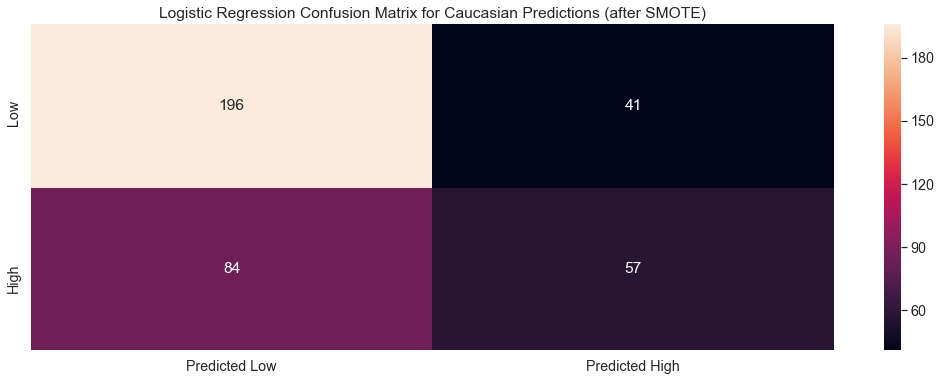

In [3501]:
# Confusion Matrix for Caucasians
conf_C = metrics.confusion_matrix(y_tr_C, y_pred_C)
fig, axes = plt.subplots(figsize=(18,6))

new_conf = pd.DataFrame(conf_C, index = ['Low','High'],columns = ['Predicted Low','Predicted High'])


sns.set(font_scale=1.3)
sns.heatmap(new_conf.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes)
axes.set_ylim([0,2]);
axes.set_title('Logistic Regression Confusion Matrix for Caucasian Predictions (after SMOTE)')

#FPR = FP/ (TN + FP)
false_pos_C = conf_C[0][1]
true_neg_C = conf_C[0][0]
fpr_C = round((false_pos_C/(true_neg_C + false_pos_C))*100, 3)

print('False Positive Rate as % for Caucasians(after SMOTE):',fpr_C)

#FNR = FN/ (FN + TP) Also called Miss Rate :Prob that a True Positive will be missed
false_neg_C = conf_C[1][0]
true_pos_C = conf_C[1][1]
fnr_C = round((false_neg_C/(true_pos_C + false_neg_C))*100, 3)

print('False Negative Rate as % for Caucasians(after SMOTE):',fnr_C)

In [3502]:
Ratio_FPR = fpr_AA/fpr_C
print('Ratio of False Positive Rates between African Americans & Caucasians(after SMOTE):',round(Ratio_FPR,2))

Ratio_FNR = fnr_AA/fnr_C
print('Ratio of False Negative Rates between African Americans & Caucasians(after SMOTE):',round(Ratio_FNR,2))

Ratio of False Positive Rates between African Americans & Caucasians(after SMOTE): 1.94
Ratio of False Negative Rates between African Americans & Caucasians(after SMOTE): 0.49


In [3503]:
BCA = acur_scr - np.abs(fpr_AA - fpr_C)
print("Bias Corrected Accuracy:",round(BCA,3))

Bias Corrected Accuracy: 51.876
